# Tokenizzazione

Diamo una dimostrazione pratica delle nozioni che abbiamo discusso a lezione sulla **tokenizzazione**. Verifichiamo come due grandi librerie per Python e una web app (UDPipe) gestiscono la tokenizzazione, utilizzando sia approcci "rule based" sia modelli addestrati su dati.

## NLTK

La libreria [Natural Language ToolKit (NLTK)](https://www.nltk.org/) è una piattaforma per il trattamento del linguaggio in Python.

Se volete saperne di più, consiglio la lettura del bellissimo libro *Natural Language Processing with Python* di S. Bird et al. (disponibile gratuitamente [qui](https://www.nltk.org/book/))

In [1]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/francesco.mambrini/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

### Tokenizzazione

Usiamo la semplice funzione `word_tokenize` con la frase di esempio usata nelle slide (leggermente modificata):

In [4]:
txt = "That U.S.A poster-print costs $12.40... Don't buy it!"
nltk.word_tokenize(txt)

['That',
 'U.S.A',
 'poster-print',
 'costs',
 '$',
 '12.40',
 '...',
 'Do',
 "n't",
 'buy',
 'it',
 '!']

Notare che:
1. la funzione esegue la semplice tokenizzazione; le frasi non sono separate
2. `don't` viene tokenizzato in 2: ["do", "n't"]

Come funziona? Ecco un frammento del codice (Python) del tokenizzatore. Suona familiare?

```python
class NLTKWordTokenizer(TokenizerI):
    # ...

    # Starting quotes.
    STARTING_QUOTES = [
        (re.compile("([«“‘„]|[`]+)", re.U), r" \1 "),
        (re.compile(r"^\""), r"``"),
        (re.compile(r"(``)"), r" \1 "),
        (re.compile(r"([ \(\[{<])(\"|\'{2})"), r"\1 `` "),
        (re.compile(r"(?i)(\')(?!re|ve|ll|m|t|s|d|n)(\w)\b", re.U), r"\1 \2"),
    ]

    # Ending quotes.
    ENDING_QUOTES = [
        (re.compile("([»”’])", re.U), r" \1 "),
        (re.compile(r"''"), " '' "),
        (re.compile(r'"'), " '' "),
        (re.compile(r"([^' ])('[sS]|'[mM]|'[dD]|') "), r"\1 \2 "),
        (re.compile(r"([^' ])('ll|'LL|'re|'RE|'ve|'VE|n't|N'T) "), r"\1 \2 "),
    ]
# ...
    PUNCTUATION = [
        (re.compile(r'([^\.])(\.)([\]\)}>"\'' "»”’ " r"]*)\s*$", re.U), r"\1 \2 \3 "),
        (re.compile(r"([:,])([^\d])"), r" \1 \2"),
        (re.compile(r"([:,])$"), r" \1 "),
        (
            re.compile(r"\.{2,}", re.U),
            r" \g<0> ",
        ),  # See https://github.com/nltk/nltk/pull/2322
        (re.compile(r"[;@#$%&]"), r" \g<0> "),
        (
            re.compile(r'([^\.])(\.)([\]\)}>"\']*)\s*$'),
            r"\1 \2\3 ",
        ),  # Handles the final period.
        (re.compile(r"[?!]"), r" \g<0> "),
        (re.compile(r"([^'])' "), r"\1 ' "),
        (
            re.compile(r"[*]", re.U),
            r" \g<0> ",
        ),  # See https://github.com/nltk/nltk/pull/2322
    ]

    # Pads parentheses
    PARENS_BRACKETS = (re.compile(r"[\]\[\(\)\{\}\<\>]"), r" \g<0> ")

    # Optionally: Convert parentheses, brackets and converts them to PTB symbols.
    CONVERT_PARENTHESES = [
        (re.compile(r"\("), "-LRB-"),
        (re.compile(r"\)"), "-RRB-"),
        (re.compile(r"\["), "-LSB-"),
        (re.compile(r"\]"), "-RSB-"),
        (re.compile(r"\{"), "-LCB-"),
        (re.compile(r"\}"), "-RCB-"),
    ]


    # ...

```

Proprio così: sono una serie di `regular expression`! Trasformano, ad es., le classi di segni di interpunzione attaccati alle parole in: parola + spazio + segno di interpunzione.

In questo modo, la tokenizzazione diventa una semplice separazione in spazi bianchi

### Sentence splitting

E il sentence splitting? Esistono funzioni apposite

In [8]:
testo = "Ciao, sono frase 1, ma puoi chiamarmi Sig.ra Frase. Tu come ti chiami?"
for frase in nltk.sent_tokenize(testo):
    print('- FRASE:', frase)

- FRASE: Ciao, sono frase 1, ma puoi chiamarmi Sig.
- FRASE: Frase.
- FRASE: Tu come ti chiami?


## Spacy

In [10]:
from IPython.display import SVG, display

[Spacy](https://spacy.io/) è una libreria Python molto moderna ed efficiente, ottimizzata per il lavoro di NLP su numerose lingue. Spacy sta rapidamente sostituendo NLTK, ma in realtà le due librerie fanno cose abbastanza diverse e possono tranquillamente coesistere...

Spacy consente di eseguire "catene" di operazione di NLP (in un flusso di lavoro chiamato "pipeline" su cui torneremo). Il flusso è ben visualizzato da questa immagine sul [sito web](https://spacy.io/usage/processing-pipelines) della libreria.

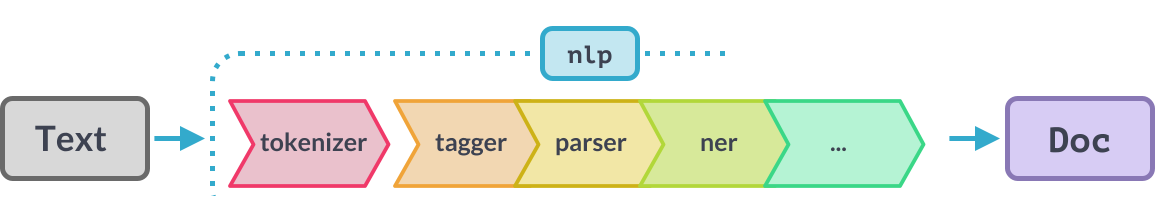

In [11]:
display(SVG(url='https://spacy.io/images/pipeline.svg'))

In [13]:
import spacy

/opt/homebrew/Caskroom/miniforge/base/envs/nlp/lib/python3.11/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Lavoriamo sull'italiano! Creiamo una pipeline vuota in cui specifichiamo solo il codice della lingua. Perché secondo voi dobbiamo specificarlo?

In [17]:
nlp = spacy.blank('it')

In [29]:
manzoni = '''Quel ramo del lago di Como, che volge a mezzogiorno, tra due catene non interrotte di monti, tutto a seni e a golfi, a seconda dello sporgere e del rientrare di quelli, vien, quasi a un tratto, a ristringersi, e a prender corso e figura di fiume, tra un promontorio a destra, e un'ampia costiera dall'altra parte; e il ponte, che ivi congiunge le due rive, par che renda ancor più sensibile all'occhio questa trasformazione, e segni il punto in cui il lago cessa, e l'Adda rincomincia, per ripigliar poi nome di lago dove le rive, allontanandosi di nuovo, lascian l'acqua distendersi e rallentarsi in nuovi golfi e in nuovi seni. La costiera, formata dal deposito di tre grossi torrenti, scende appoggiata a due monti contigui, l'uno detto di san Martino, l'altro, con voce lombarda, il Resegone, dai molti suoi cocuzzoli in fila, che in vero lo fanno somigliare a una sega: talché non è chi, al primo vederlo, purché sia di fronte, come per esempio di su le mura di Milano che guardano a settentrione, non lo discerna tosto, a un tal contrassegno, in quella lunga e vasta giogaia, dagli altri monti di nome più oscuro e di forma più comune. Per un buon pezzo, la costa sale con un pendìo lento e continuo; poi si rompe in poggi e in valloncelli, in erte e in ispianate, secondo l'ossatura de' due monti, e il lavoro dell'acque. Il lembo estremo, tagliato dalle foci de' torrenti, è quasi tutto ghiaia e ciottoloni; il resto, campi e vigne, sparse di terre, di ville, di casali; in qualche parte boschi, che si prolungano su per la montagna. Lecco, la principale di quelle terre, e che dà nome al territorio, giace poco discosto dal ponte, alla riva del lago, anzi viene in parte a trovarsi nel lago stesso, quando questo ingrossa: un gran borgo al giorno d'oggi, e che s'incammina a diventar città. Ai tempi in cui accaddero i fatti che prendiamo a raccontare, quel borgo, già considerabile, era anche un castello, e aveva perciò l'onore d'alloggiare un comandante, e il vantaggio di possedere una stabile guarnigione di soldati spagnoli, che insegnavan la modestia alle fanciulle e alle donne del paese, accarezzavan di tempo in tempo le spalle a qualche marito, a qualche padre; e, sul finir dell'estate, non mancavan mai di spandersi nelle vigne, per diradar l'uve, e alleggerire a' contadini le fatiche della vendemmia. Dall'una all'altra di quelle terre, dall'alture alla riva, da un poggio all'altro, correvano, e corrono tuttavia, strade e stradette, più o men ripide, o piane; ogni tanto affondate, sepolte tra due muri, donde, alzando lo sguardo, non iscoprite che un pezzo di cielo e qualche vetta di monte; ogni tanto elevate su terrapieni aperti: e da qui la vista spazia per prospetti più o meno estesi, ma ricchi sempre e sempre qualcosa nuovi, secondo che i diversi punti piglian più o meno della vasta scena circostante, e secondo che questa o quella parte campeggia o si scorcia, spunta o sparisce a vicenda. Dove un pezzo, dove un altro, dove una lunga distesa di quel vasto e variato specchio dell'acqua; di qua lago, chiuso all'estremità o piùttosto smarrito in un gruppo, in un andirivieni di montagne, e di mano in mano più allargato tra altri monti che si spiegano, a uno a uno, allo sguardo, e che l'acqua riflette capovolti, co' paesetti posti sulle rive; di là braccio di fiume, poi lago, poi fiume ancora, che va a perdersi in lucido serpeggiamento pur tra' monti che l'accompagnano, degradando via via, e perdendosi quasi anch'essi nell'orizzonte. Il luogo stesso da dove contemplate que' vari spettacoli, vi fa spettacolo da ogni parte: il monte di cui passeggiate le falde, vi svolge, al di sopra, d'intorno, le sue cime e le balze, distinte, rilevate, mutabili quasi a ogni passo, aprendosi e contornandosi in gioghi ciò che v'era sembrato prima un sol giogo, e comparendo in vetta ciò che poco innanzi vi si rappresentava sulla costa: e l'ameno, il domestico di quelle falde tempera gradevolmente il selvaggio, e orna vie più il magnifico dell'altre vedute.'''
tweet = '''8 MARZO | Al Senato il concerto in occasione delle celebrazioni della "Giornata Internazionale della Donna"
#ANSA'''

In [30]:
tok_exp = nlp.tokenizer.explain(tweet)

In [31]:
tok_exp

[('TOKEN', '8'),
 ('TOKEN', 'MARZO'),
 ('TOKEN', '|'),
 ('TOKEN', 'Al'),
 ('TOKEN', 'Senato'),
 ('TOKEN', 'il'),
 ('TOKEN', 'concerto'),
 ('TOKEN', 'in'),
 ('TOKEN', 'occasione'),
 ('TOKEN', 'delle'),
 ('TOKEN', 'celebrazioni'),
 ('TOKEN', 'della'),
 ('PREFIX', '"'),
 ('TOKEN', 'Giornata'),
 ('TOKEN', 'Internazionale'),
 ('TOKEN', 'della'),
 ('TOKEN', 'Donna'),
 ('SUFFIX', '"'),
 ('PREFIX', '#'),
 ('TOKEN', 'ANSA')]

Il metodo `explain()` serve proprio a rendere esplicito il funzionamento del tokenizzatore! Il tokenizzatore di `spacy` funziona così:
1. segmenta il testo usando gli **spazi bianchi**
2. controlla i token ottenuti da questo primo passaggio e prova a separare dei "prefissi" o "suffissi" (e.g. virgole, segni di punteggiatura)
3. continua con 2 finché nessun token può essere ulteriormente scomposto

Vediamo un esempio francese:

In [ ]:
fr = spacy.blank('fr')
fr.tokenizer.explain("Je l'ai vu aujud'hui; je n'ai pas compris d'où il venait")

[('TOKEN', 'Je'),
 ('PREFIX', "l'"),
 ('TOKEN', 'ai'),
 ('TOKEN', 'vu'),
 ('TOKEN', "aujud'"),
 ('TOKEN', 'hui'),
 ('SUFFIX', ';'),
 ('TOKEN', 'je'),
 ('PREFIX', "n'"),
 ('TOKEN', 'ai'),
 ('TOKEN', 'pas'),
 ('TOKEN', 'compris'),
 ('PREFIX', "d'"),
 ('TOKEN', 'où'),
 ('TOKEN', 'il'),
 ('TOKEN', 'venait')]

E il cinese? Servirà, ovviamente, una lista di regole/parole speciale!

In [22]:
zh_nlp = spacy.blank('zh')

In [25]:
for tok in zh_nlp('姚明进入总决赛'):
    print(tok)

姚
明
进
入
总
决
赛


### Sentence splitting

Il sentence splitting è eseguito *dopo* la tokenizzazione.

## UDPipe

[UDPipe](https://lindat.mff.cuni.cz/services/udpipe/) è un'altra serie di applicazioni e modelli in "pipeline" per eseguire analisi linguistica. Nelle prossime lezioni vedremo meglio anche le altre componenti. Per ora concentriamoci sulla tokenizzazione e sul sentence splitting.

Un'interfaccia `UDPipe` in Python è disponibile, ma per questo semplice esercizio useremo Python solo per interrogare l'applicazione disponibile sul web. Invieremo la frase da processare via internet al servizio e riceveremo in risposta il testo analizzato.

In [33]:
import requests

In [34]:
sent_ita = "Le chance che la Fed non alzi i tassi di interesse alla prossima riunione di marzo sono al 66%. È quanto emerge dall'andamento degli swap, secondo quanto riporta Cnbc."

In [41]:
files = {
    'data': sent_ita.encode(),
    'model': (None, 'italian-isdt-ud-2.10-220711'),
    'tokenizer': (None, ''),
}

In [42]:
response = requests.post('http://lindat.mff.cuni.cz/services/udpipe/api/process', files=files)
assert response.status_code == 200

In [43]:
print(response.json()['result'])

# generator = UDPipe 2, https://lindat.mff.cuni.cz/services/udpipe
# udpipe_model = italian-isdt-ud-2.10-220711
# udpipe_model_licence = CC BY-NC-SA
# newdoc
# newpar
# sent_id = 1
# text = Le chance che la Fed non alzi i tassi di interesse alla prossima riunione di marzo sono al 66%.
1	Le	_	_	_	_	_	_	_	_
2	chance	_	_	_	_	_	_	_	_
3	che	_	_	_	_	_	_	_	_
4	la	_	_	_	_	_	_	_	_
5	Fed	_	_	_	_	_	_	_	_
6	non	_	_	_	_	_	_	_	_
7	alzi	_	_	_	_	_	_	_	_
8	i	_	_	_	_	_	_	_	_
9	tassi	_	_	_	_	_	_	_	_
10	di	_	_	_	_	_	_	_	_
11	interesse	_	_	_	_	_	_	_	_
12-13	alla	_	_	_	_	_	_	_	_
12	a	_	_	_	_	_	_	_	_
13	la	_	_	_	_	_	_	_	_
14	prossima	_	_	_	_	_	_	_	_
15	riunione	_	_	_	_	_	_	_	_
16	di	_	_	_	_	_	_	_	_
17	marzo	_	_	_	_	_	_	_	_
18	sono	_	_	_	_	_	_	_	_
19-20	al	_	_	_	_	_	_	_	_
19	a	_	_	_	_	_	_	_	_
20	il	_	_	_	_	_	_	_	_
21	66	_	_	_	_	_	_	_	SpaceAfter=No
22	%	_	_	_	_	_	_	_	SpaceAfter=No
23	.	_	_	_	_	_	_	_	_

# sent_id = 2
# text = È quanto emerge dall'andamento degli swap, secondo quanto riporta Cnbc.
1	È	_	_	_	_	_	

Notare un sacco di cose!
1. la pipeline ha fatto *sia* tokenizzazione, *sia* sentence splitting
2. il processo di tokenizzazione non è distruttivo (notare `SpaceAfter=No`): posso sempre ricostruire il testo dalla sequenza dei token
3. notare il trattamento di *alla* (12-13)
4. nella richiesta abbiamo dovuto specificare non tanto la lingua (come in `spacy`), quanto il nome di un **modello** addestrato!

Proviamo il cinese!

In [58]:
sent_zh = '姚明进入总决赛 '

files = {
    'data': sent_zh.encode(),
    'model': (None, 'chinese-gsdsimp-ud-2.6-200830'),
    'tokenizer': (None, ''),
    'tagger': (None, ''),
    'parser': (None, '')
}

response = requests.post('http://lindat.mff.cuni.cz/services/udpipe/api/process', files=files)
assert response.status_code == 200

In [59]:
print(response.json()['result'])

# generator = UDPipe 2, https://lindat.mff.cuni.cz/services/udpipe
# udpipe_model = chinese-gsdsimp-ud-2.6-200830
# udpipe_model_licence = CC BY-NC-SA
# newdoc
# newpar
# sent_id = 1
# text = 姚明进入总决赛
1	姚明	姚明	PROPN	NNP	_	2	nsubj	_	SpaceAfter=No
2	进入	进入	VERB	VV	_	0	root	_	SpaceAfter=No
3	总	总	PART	PFA	_	4	case:pref	_	SpaceAfter=No
4	决赛	决赛	NOUN	NN	_	2	obj	_	_


